In [1]:
import pandas as pd
import numpy as np
import re
import sys
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# importing training dataset:
train_dataset = pd.read_csv(r"train_tweets.csv")

# cleaning the tweets of the train_dataset:
def clean(each):
    
    l = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    m = [each.upper() for each in l]
    w = ''
    
    for i in range(0,len(each)):
        
        if each[i] == ' ':
            w = w + each[i]
            
        if each[i] == '#':
            w = w + " "
            
        if each[i] in l or each[i] in m:
            w = w + each[i]
            
    return ' '.join(w.split())

for i in range(len(train_dataset['tweet'])):
    unclean_tweet = str(train_dataset.ix[i, 'tweet'])
    unclean_tweet = unclean_tweet.strip()
    clean_tweet = clean(unclean_tweet)
    
    train_dataset.ix[i, 'tweet'] = clean_tweet
    
# importing the test dataset for cleaning it 
test_dataset = pd.read_csv(r'test_tweets.csv')

# cleaning the tweets of the test_dataset:
for i in range(len(test_dataset['tweet'])):
    unclean_tweet = str(test_dataset.ix[i, 'tweet'])
    unclean_tweet = unclean_tweet.strip()
    
    clean_tweet = clean(unclean_tweet)
    
    test_dataset.ix[i, 'tweet'] = clean_tweet
    
# corpus list to have all the training tweets
corpus = list(train_dataset['tweet'])

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=3000)

X = vectorizer.fit_transform(corpus).toarray()   # tweets vectorized
y = train_dataset['label']                       # label attached

classifier_naive = GaussianNB()
classifier_naive.fit(X,y)

# to predict for test_dataset's tweets columns ,all tweets
to_predict = list(test_dataset['tweet'])

transformed_to_predict_tweets = vectorizer.transform(to_predict).toarray()

label_predicted = classifier_naive.predict(transformed_to_predict_tweets)

test_dataset['label'] = label_predicted

test_dataset.to_csv(r"final_predictions.csv", index=False)

C:\Users\PRAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\PRAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\PRAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\PRAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: 
.ix is deprecated. Please use

In [9]:
X = vectorizer.fit_transform(corpus).toarray()   # tweets vectorized
y = train_dataset['label']                       # label attached

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
classifier_naive.fit(X_train,y_train)

GaussianNB(priors=None)

In [12]:
print(classification_report(y_test,classifier_naive.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83      7453
          1       0.17      0.78      0.28       538

avg / total       0.92      0.72      0.79      7991



In [43]:
print(accuracy_score(y_test,classifier_naive.predict(X_test)))

0.6979101489175322


In [13]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [14]:
print(confusion_matrix(y_test,classifier_naive.predict(X_test)))

[[5369 2084]
 [ 119  419]]


In [ ]:
#7991 = 5369 + 2084 + 119 + 419 total predictions were made by the classifier
#2503 times 1 was predicted and 5488 times 0 was predicted
#5369 are labelled 0 and are predicted as 0
#419 are labelled 1 and predicted as 1
#2084 are labelled as 0 and predicted 1
#119 are labelled as 1 but predicted 0

In [16]:
import seaborn as sns

In [18]:
final_dataset = pd.read_csv(r"final_predictions.csv")

In [20]:
final_dataset.head()

,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,user white supremacists want everyone to see t...,0
2,31965,safe ways to heal your acne altwaystoheal heal...,0
3,31966,is the hp and the cursed child book up for res...,1
4,31967,rd bihday to my amazing hilarious nephew eli a...,0


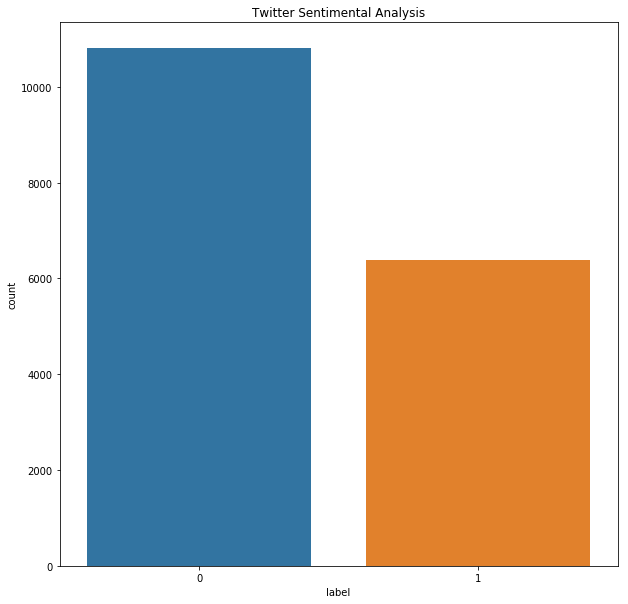

In [29]:
plt.figure(figsize=(10,10))
# plt.xlabel("Sentiments(1 and 0)")
# plt.ylabel("Count of Setiments")
plt.title("Twitter Sentimental Analysis")
sns.countplot(data=final_dataset, x="label")